***Сборный проект "Интернет-магазин компьютерных игр".***

Цель проекта - определить определяющие успешность игры закономерности и  сделать ставку на потенциально популярный продукт.

***План работ:***

***1)*** Изучить информацию из файла 'Games', подготовить данные для последующего анализа:
 - откорректировать названия столбцов;
 - выявить пропуски, по возможности объяснить их причины и избавиться от них там, где возможно;
 - посчитать суммарные продажи во всех регионах и создать для них отдельный столбец.
 
***2)*** Провести исследовательский анализ данных:
- Посчитать, сколько игр выпускалось в разные годы, определить, какие периоды актуальны для анализа;
- Определить, как менялись продажи по платформам, выявить платформы с наибольшими суммарными продажами, построить распределения по годам. Выявить характерный срок, за который появляются новые и исчезают старые платформы.
- Определить актуальный период, который нужно использовать для построения прогноза на 2017 год.
- Выявить динамику продаж на разных платформах, выбрать несколько потенциально прибыльных платформ.
- Построить диаграмму размаха по глобальным продажам игр в разбивке по платформам. 
- Определить корреляцию между продажами и отзывами пользователей и критиков внутри популярных платформы, построить диаграммы рассеяния и посчитать коэффициенты корреляции. 
- Посмотреть распределение игр по жанрам, выделить жанры с высокими и низкими продажами.

***3)*** Составить портрет пользователей для Северной Америки, Европы и Японии, определить для пользователя каждого региона
- Самые популярные платформы (топ-5), описать различия в долях продаж.
- Самые популярные жанры (топ-5), пояснить разницу.
- Понять, влияет ли рейтинг ESRB на продажи в каждом регионе.

***4)*** Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

In [1]:
import copy
from datetime import date
import pandas as pd
import math
from math import factorial
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

import numpy as np
import seaborn as sns

import scipy.stats as stats
from scipy import stats
from scipy import stats as st
from scipy.stats import binom
from scipy.stats import levene

***Шаг 1. Загрузка данных.***

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Выведем первые строки файла и посмотрим общую информацию.

In [3]:
display(data.head())
display(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

В файле 16715 строк. Видим пропуски в следующих столбцах:
- Год релиза: пропущено 1,6% значений (269 строк);
- Оценка критиков: пропущено 51,3% значений (8,6 тыс строк);
- Оценка пользователей: пропущено 40% значений (6,7 тыс. строк);
- Рейтинг: пропущено 40,5% значений (6,77 тыс. строк).
    
Во всех столбцах нужно привести названия столбцов к нижнему регистру.
Видно, что нужно поменять типы данных в некоторых столбцах, подробнее напишем об этом после корректировки названий столбцов.

***Шаг 2. Подготовка данных.***

Приведем названия столбцов к нижнему регистру.


In [4]:
data.columns= data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Перед обработкой пропусков посмотрим уникальные значения в столбцах name, genre, platform, year_of_release, critic_score, user_score, rating. В остальных столбцах (где указаны продажи) уникальных значений очень много, и знать их все ни к чему.

In [5]:
list_columns = ['name', 'genre', 'platform', 'year_of_release', 'critic_score', 'user_score', 'rating']
for value in list_columns:
    print(f'\nУникальные значения в столбце {value}: ', data[value].sort_values().unique())


Уникальные значения в столбце name:  [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]

Уникальные значения в столбце genre:  ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]

Уникальные значения в столбце platform:  ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

Уникальные значения в столбце year_of_release:  [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]

Уникальные значения в столбце critic_score:  [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 4

Посмотрим число строк со значением 'tbd' в столбце 'user_score'.

In [6]:
data.loc[data['user_score'] =='tbd'].shape

(2424, 11)

Пользовательские оценки 'tbd' занимают 14,5% строк (2424). Чаще всего это обозначение используется для обозначения даты выхода еще не вышедшей игры и расшифорвывается как 'to be determined'. Но может использоваться уже для вышедших игр, если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено. В случае с рейтингом tbd означает, что рейтинг еще не присвоен, поэтому корректно заменить значение 'tbd' на 'NaN.

In [7]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
print(data.loc[data['user_score'] =='tbd'].shape)

(0, 11)


Преобразуем типы данных в следующих столбцах:

***1)*** **year_of_release** приводим к типу Int. Годы релиза измеряются целыми числами, а не дробными.

***2)*** **user_score** нужно привести к типу float. Оценки измеряются численным, а не текстовым форматом. Дальнейший анализ и расчеты невозможно будет делать, если оставить оценки в формате object.

***3)*** Видим, что в столбце **critic_score** после запятых стоят нули, можно было бы заменить на целочисленный тип данных, но далее, возможно, в расчетах удобнее будет оперировать числами в формате float.


In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


***Обработка пропусков***

Посчитаем число пропусков в тех столбцах, где они есть.

In [9]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total_values'] = ((report['missing_values'] / data.shape[0])*100).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total_values
user_score,9125,54.59
critic_score,8578,51.32
rating,6766,40.48
year_of_release,269,1.61
name,2,0.01
genre,2,0.01
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


Посмотрим строки с пропусками в столбце name:

In [10]:
display(data.loc[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что строки с пропусками в столбцах name и genre - это одни и те же строки, их всего две, и их отсутствие на результат анализа существенно не повлияет, тем более что продажи этих игр очень скромные, и оценки/рейтинг отсутсвуют. Удалим.

In [11]:
data = data.dropna(subset = ['name'])

В столбце с годом релиза 269 пропусков (1,6%), посмотрим другие значения в этих строках.

In [12]:
data_year_null = data.loc[data['year_of_release'].isna()]
data_year_null.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


В дальнейшем необходимо будет группировать данные по годам, поэтому важно, чтобы пропусков в столбце year_of_release не было. В теории можно пройтись по всем названиям игр с пропусками в годе релиза, найти эту игру и год выпуска, но это очень затратно по времени. В таблице в первыми 20 строками видим, что продажи этих игр (с пропусками в годе выпуска) сильно меньше аналогичных значений в исходной таблице. Поскольку эти строки составляют не очень существенный процент (1,6%) от общего числа строк, лучше их удалить.

In [13]:
data = data.loc[data['year_of_release'].notna()]
data.reset_index()
data['year_of_release'].isna().sum()

0

Заполнить пропуски в столбцах user_score, critic_score в данном случае не возможно, т к оценки субъективны и они отсутствуют в более чем половине строк. Если бы строк с пропусками был не существенный процент, то можно было подумать о заполнении средним значеним по данному жанру.
По той же причине не будем заполнять пропуски в столбце рейтинга, т к доля пропусков здесь 40%.

Проверим на полные дубликаты.

In [14]:
data.duplicated().sum()

0

Дубликатов нет.

Проверим датасет на наличие неявных дубликатов, посмотрим, есть ли совпадения у строк по столбцам с названием игры, платформы и годом выпуска

In [15]:
data.loc[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Посмотрим, в каких строках встречаеются совпадения по названию игры, платформы и году выпуска.

In [16]:
data.loc[(data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


В строках 604 и 16230 совпадают название игры, платформы и год выпуска, но значения продаж разные - нужно объединить эти строки, сложив значения продаж.

In [17]:
#Сложим значения продаж в строках-дубликатах с индексами 604 и 16230 

data.loc[[604], 'na_sales'] = data.loc[[16230], 'na_sales'] +(data.loc[[604], 'na_sales'])
data.loc[[604], 'eu_sales'] = data.loc[[16230], 'eu_sales'] +(data.loc[[604], 'eu_sales'])
data.loc[[604], 'jp_sales'] = data.loc[[16230], 'jp_sales']+(data.loc[[604], 'jp_sales'])

display(data.loc[[604]])



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,NaN,NaN,NaN,0.23,83.0,5.5,E


Можно удалить строку с индексом 16230, т к там нулевые продажи, а все остальное - копия другой строки.

In [18]:
data = data.drop(index = 16230)

data.loc[(data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,NaN,NaN,NaN,0.23,83.0,5.5,E


Посчитаем суммарные продажи во всех регионах.

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16442 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


***Вывод по итогам обработки данных:***

***1)*** Привели названия столбцов к нижнему регистру.

***2)*** Обработали значения 'tbd' ('to be determined') в столбце user_score, заменили на NaN.

***3)*** Поменяли тип данных в столбце года выпуска с дробного на целочисленный, в столбце оценки пользователей с текстового на float.

***4)*** Удалили строки с отсутствующими данными name, genre, scores, rating. Удалили строки, где не был указан год выпуска. Удалили явный и неявный дубликат. В результате удаления строк с пропусками избавились от 1,6% строк (минус 273 строки).

***5)*** Добавили столбец с общим объемом продаж по всем регионам.

***Шаг 3. Исследовательский анализ данных.***

Посмотрим, сколько игр выпускалось в разные годы. Сделаем сводную таблицу, сгруппировав данные по годам.


In [20]:
data_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
data_year.columns = ['games_number']
display(data_year)

,games_number
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


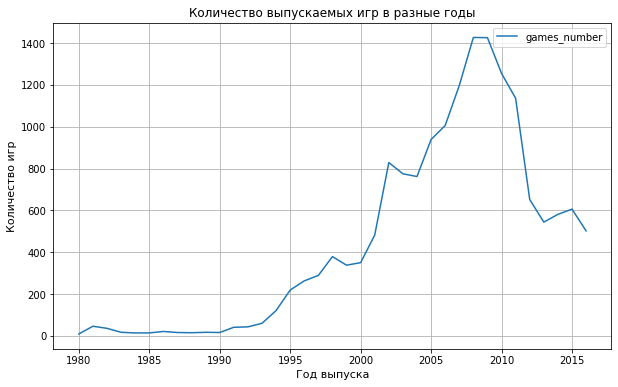

In [21]:
data_year.plot(style='-',title='Количество выпускаемых игр в разные годы', figsize=(10,6), grid = True)
plt.xlabel('Год выпуска', fontsize=11)
plt.ylabel('Количество игр', fontsize=11)
plt.show()

На графике хорошо видно, что число выпускаемых игр до 1990 года было низким в сравнении с остальными периодами - это легко объяснимо уровнем развития технологий и интернета. В период 1990-1995 наметился устойчивый рост, к 2000 году число выпускамемых в год игр вырсоло в 2 раза (с 200 до 400 в год). С 2000 по 2009 наблюдался стремительный рост, затем стремительное падение к 2012 году. Прогонозировать дальнейшую логику интересно, т к тут возможен как небольшой рост, так и дальнейшее падение. 
Для анализа лучше брать данные с начала 2000-х, т к в тот период число выпускаемых игр в год было близко к уровню последнего года.

Посмотрим, как менялись продажи по платформам и выясним, за какой срок появляются новые и исчезают старые платформы.
Составим таблицу с общей суммой продаж по каждой платформе.

In [22]:
data_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
sort_values('total_sales', ascending = False)
display(data_platforms)
                    

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,928.77
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим график распределеия продаж по платформам.

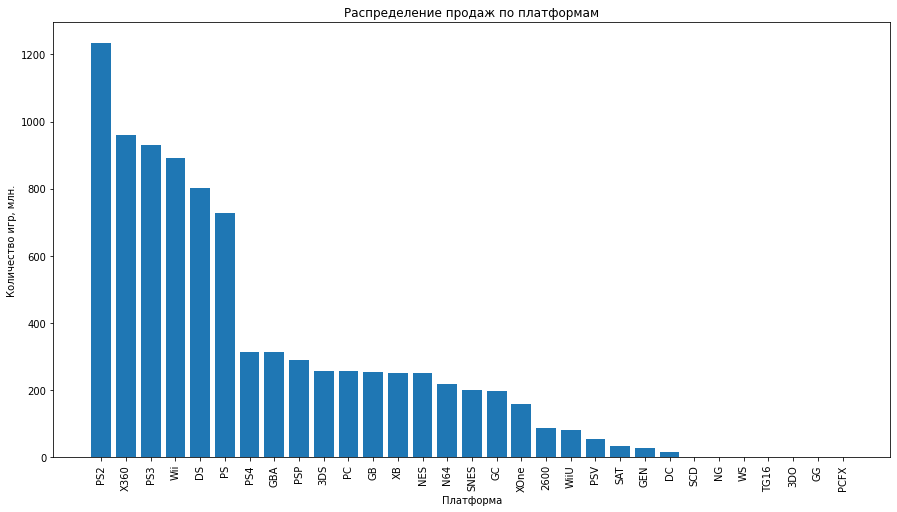

In [24]:
plt.figure(figsize=(15,8))
plt.bar(data_platforms.index, data_platforms['total_sales'])
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.xticks(rotation=90)
plt.ylabel('Количество игр, млн.')
plt.show()

В таблице и на графике выделяются 6 платформ-лидеров продаж: PS2, X360, PS3, Wii, DS, PS.
Построим распределения продаж по годам по каждой из платформ-лидеров. Создадим список с лидерами продаж.

In [25]:
platform_leaders = list(data_platforms.index[:6])
platform_leaders

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Сделаем сводные таблицы, в которых будут собраны продажи по годам, а также графики, отображающие распределения продаж по годам для каждой из шести платформ из 6 лидеров.

Распределение продаж по платформе  PS2
                 total_sales
year_of_release             
2000                   39.17
2001                  166.43
2002                  205.38
2003                  184.31
2004                  211.81
2005                  160.66
2006                  103.42
2007                   75.99
2008                   53.90
2009                   26.40
2010                    5.64
2011                    0.45


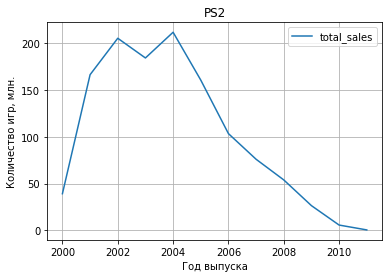

Распределение продаж по платформе  X360
                 total_sales
year_of_release             
2005                    8.25
2006                   51.62
2007                   95.41
2008                  135.26
2009                  120.29
2010                  170.03
2011                  143.84
2012                   99.74
2013                   88.58
2014                   34.74
2015                   11.96
2016                    1.52


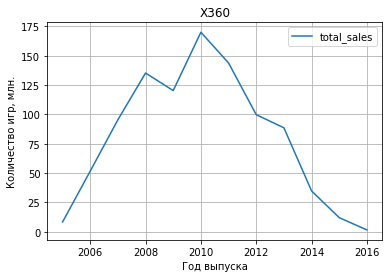

Распределение продаж по платформе  PS3
                 total_sales
year_of_release             
2006                   20.96
2007                   73.19
2008                  118.52
2009                  130.93
2010                  142.17
2011                  156.78
2012                  104.79
2013                  113.25
2014                   47.76
2015                   16.82
2016                    3.60


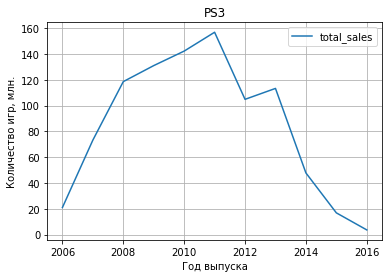

Распределение продаж по платформе  Wii
                 total_sales
year_of_release             
2006                  137.15
2007                  152.77
2008                  171.32
2009                  206.97
2010                  127.95
2011                   59.65
2012                   21.71
2013                    8.59
2014                    3.75
2015                    1.14
2016                    0.18


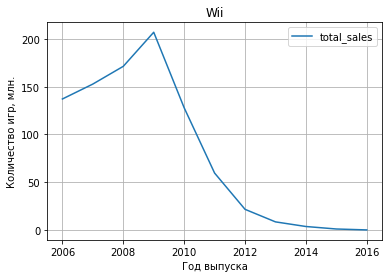

Распределение продаж по платформе  DS
                 total_sales
year_of_release             
1985                    0.02
2004                   17.27
2005                  130.14
2006                  119.81
2007                  146.94
2008                  145.31
2009                  119.54
2010                   85.02
2011                   26.18
2012                   11.01
2013                    1.54


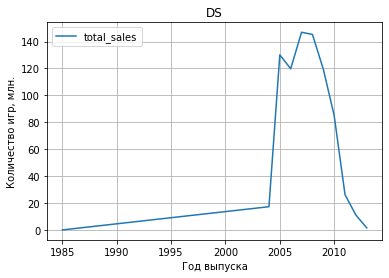

Распределение продаж по платформе  PS
                 total_sales
year_of_release             
1994                    6.03
1995                   35.96
1996                   94.70
1997                  136.17
1998                  169.49
1999                  144.53
2000                   96.37
2001                   35.59
2002                    6.67
2003                    2.07


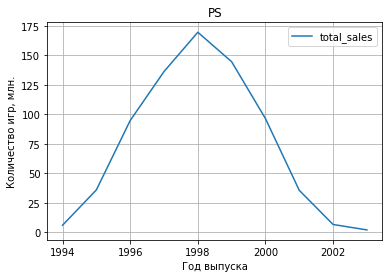

In [26]:
for value in platform_leaders:
    print('Распределение продаж по платформе ', value)
    platform_sales = data.loc[data['platform'] == value].pivot_table(index = 'year_of_release', \
                                   values = 'total_sales', aggfunc = 'sum')
    print(platform_sales)
    platform_sales.plot(grid = True)
    plt.xlabel('Год выпуска', fontsize = 10)
    plt.ylabel('Количество игр, млн.', fontsize = 10)
    plt.title(value)
    plt.show()
                                               

Необычный левый хвост графика по платформе DS обусловлен ошибкой: платформа вышла в 2004 году, и у нее не могло быть продаж раньше. Обработаем ошибку, посмотрим продажи за 1985 год, отправим эти продажи из 1985 в нужный год.

In [27]:
display(data.loc[(data['platform'] == "DS") & (data['year_of_release'] < 2004)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


По ошибке выходом года игры указали 1985 год, а эта игра вышла в 2007 году. Исправим.

In [28]:
data.loc[data['name']=='Strongest Tokyo University Shogi DS', 'year_of_release']=2007
data.loc[data['name']=='Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Проверим, ушел ли хвост, все ли ошибки удалили:

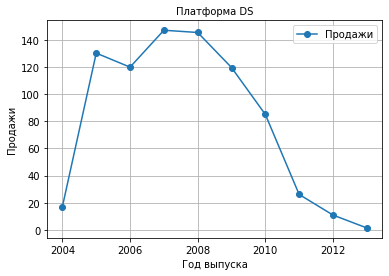

In [29]:
plt.figure(figsize=[6, 4])
platform_ds = data.loc[data['platform'] == 'DS'].pivot_table(index = 'year_of_release', \
                                   values = 'total_sales', aggfunc = 'sum')
plt.title(f'Платформа DS', fontsize=10)
plt.plot(platform_ds, 'o-', label='Продажи', alpha=1)
plt.ylabel('Продажи')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.legend()
plt.show();

Хвост ушел, значит, ошибок не осталось.

Несмотря на явное лидерство платформы PS2 ее продажи падают экспоненциально с 2004 года. Похожие экспоненциальные тенденции падения продаж с 2009 года у платформы Wii и примерно с 2008 года у DS.
Распределения продаж у платформ PS, PS3 и X360 похожи на нормальные. У PS3 и Х360 продажи падают с 2011 и 2010 гг соответственно, но не такими резкими темпами, как у PS2, Wii, DS.
У платформы PS продажи плавно падают с 1998 года.

Чтобы выяснить, за какой срок появляются новые и исчезают старые платформы, нужно посмотреть распределение продаж основных платформ по годам выпуска. Для наглядности это нужно сделать на одном графике.

In [30]:
#Создадим список с первыми 10 платформами по объему продаж
top_platforms = data_platforms.sort_values(by='total_sales', ascending=False).head(10).reset_index(drop=False)
display(top_platforms)
top_platforms_list = list(top_platforms['platform'])
print(top_platforms_list)
#Создадим таблицу на базе исходной, в которой будет собрана информация по  топ-10 платформам 
platforms_to_analyse = data.query('platform in @top_platforms_list and year_of_release > 1995').\
                       groupby(['platform', 'year_of_release'])[['total_sales']].sum()
platforms_to_analyse.head(10)



,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,928.77
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.96

Построим графики распределения продаж по годам по каждой из ТОП-10 платформ

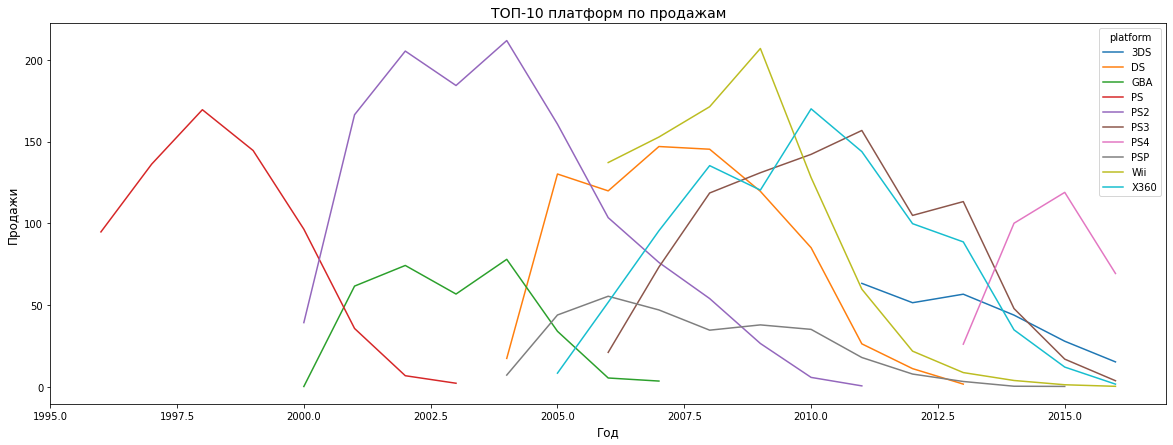

In [31]:
plt.figure(figsize=(20,7))
fig = sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=platforms_to_analyse.reset_index())
fig.set_title('ТОП-10 платформ по продажам', fontsize=14)
fig.set_xlabel('Год', fontsize=12)
fig.set_ylabel('Продажи', fontsize=12)
plt.show()

Для определения характерного срока жизни платформ и установки актуального периода я бы посмотрела графики не только по ТОП-10, но и по всем платформам.

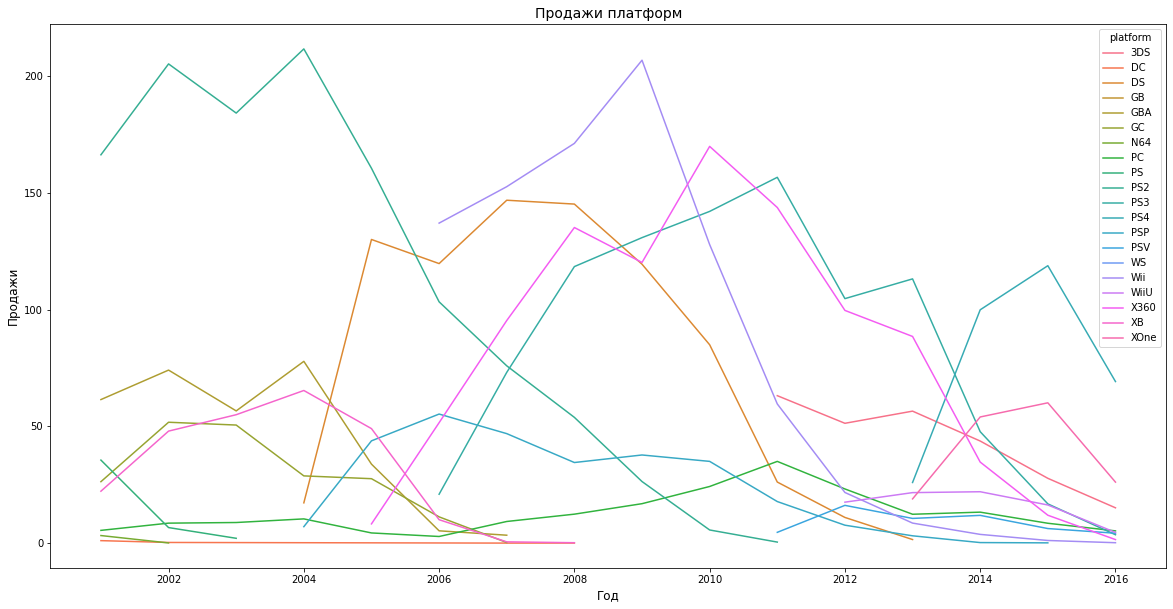

In [32]:
all_platforms_to_analyse = data.query('year_of_release > 2000').\
                       groupby(['platform', 'year_of_release'])[['total_sales']].sum()

plt.figure(figsize=(20,10))
fig = sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=all_platforms_to_analyse)
fig.set_title('Продажи платформ', fontsize=14)
fig.set_xlabel('Год', fontsize=12)
fig.set_ylabel('Продажи', fontsize=12)
plt.show()

По графикам можно понять, что каждая платформа имеет свой срок, видно завершенные циклы 8, 9, 10, 11 лет.
Я выделила из таблицы только строки с датами релиза не ранее 2000 года. Информацию о более ранних периодах смотреть не актуально, т к динамика развития рынка до 2000 года имела другие темпы.

Можно еще посчитать сроки работы платформ с помощью цикла.

In [33]:
#Выделим строки с датой релиза от 2000 года
data_actual = data.loc[data['year_of_release']>=2000]

#Составим список платформ из полученной таблицы и посчитаем срок работы каждой платформы
list_of_platforms = data_actual['platform'].unique()
#table_platforms = pd.Series(list_of_platforms)
list_of_lifecycles = []
for value in list_of_platforms:
    life_cycle = data_actual.loc[data_actual['platform'] == value].\
                 pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    life_cycle_ = life_cycle['total_sales']
    list_of_lifecycles.append(life_cycle_)
    
table_lifecycles = pd.DataFrame ({ 'platform': list_of_platforms, 
    'lifecycle': list_of_lifecycles})
print('Сроки работы платформ: ')
display(table_lifecycles)

median_life_cycle = int(np.median(list_of_lifecycles))
mean_life_cycle = int(np.mean(list_of_lifecycles))
print(f'Средний медианный срок работы платформы - {median_life_cycle} лет')
print(f'Средний арифметический срок работы платформы - {mean_life_cycle} лет')

Сроки работы платформ: 


,platform,lifecycle
0,Wii,11
1,DS,10
2,X360,12
3,PS3,11
4,PS2,12
5,GBA,8
6,PS4,4
7,3DS,6
8,XB,9
9,PC,17


Средний медианный срок работы платформы - 6 лет
Средний арифметический срок работы платформы - 7 лет


На графиках видно, что у топовых платформ срок работы длится 6-7-8-11 лет. Если смотреть в таблицу с расчетными циклами работы платформ, то видим сроки 2-3-4 года - это те платформы, которые еще не изжили себя и запустились недавно.
Чтобы определиться с характерным сроком жизн платформ, нужно принимать во внимание и графики, и таблицу, т к по отдельности они не могут давать полную картину. 
Медианный и средний арифметические сроки работы платформ считаются как 6 и 7 лет - здесь нужно сделать корректировку в бОльшую сторону, т к при расчетах учитывались еще не завершившиеся циклы работы платформ (2,3, 4 года). На графиках видны уже завершившиеся циклы 11 лет, 8 лет, 6 лет, 10 лет. Еще видно, что в 2011-2013гг запустились платформы, которые уже до 2016 года достигли своего пика и пошли на спад. Глядя на графики, значения пиков по этим новым платформам можно предположить, что их сроки будут короче 9-10 лет.
Я бы назвала средним сроком жизни платформы 8-летний период.

***Актуальный период***
На графике видим 4 платформы, которые запустились в 2011-2013 годах, динамика и характер развития которых (темпы роста, пиковые значения, срок достижения пиков) заметно отличаются от предшествующих, имеющих длинный цикл и более высокие пиковые значения.
Исходя из этого предлагаю установить актуальным сроком 4 года (с 2013 по 2016 год.)

Создадим таблицу с информацией от 2012 года.

In [34]:
data_prognose = data.loc[data['year_of_release']>=2012].groupby(['platform', 'year_of_release'])[['total_sales']].sum()
data_prognose.head(10)

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.22
         2013                   12.38
         2014                   13.28

Чтобы понять динамику продаж на разных платформах, построим графики

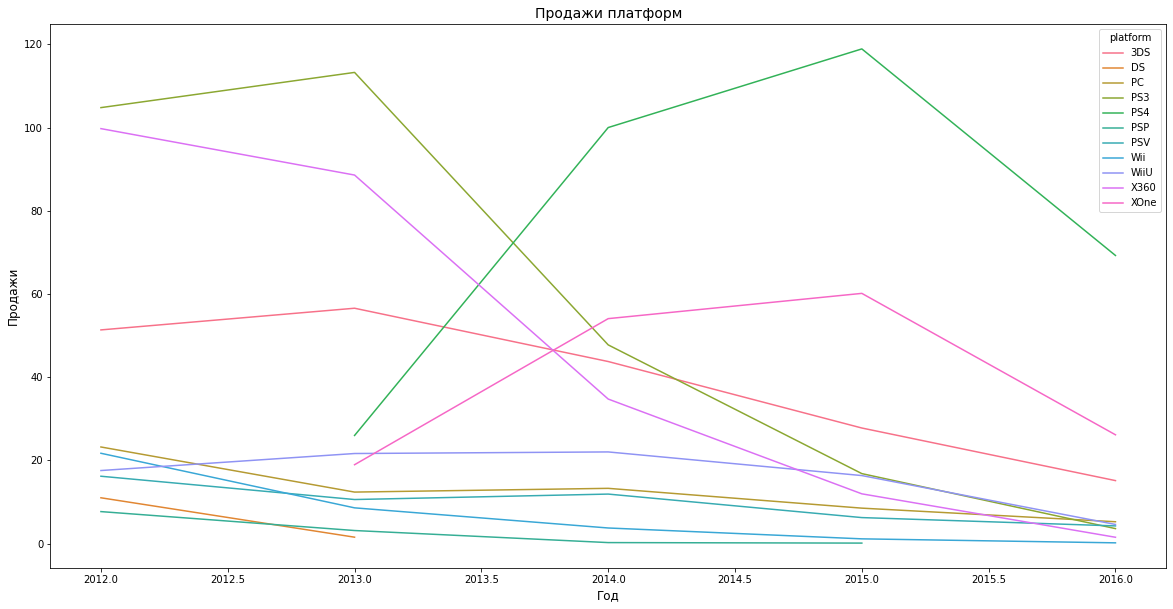

In [35]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=data_prognose.reset_index())
fig.set_title('Продажи платформ', fontsize=14)
fig.set_xlabel('Год', fontsize=12)
fig.set_ylabel('Продажи', fontsize=12)
plt.show();

На графике видно, что все платформы находятся на стадии спада продаж, самые высокие продажи в 2016 году у платформ PS4, XOne, 3DS. Посмотрим итоговые продажи у всех платформ и отсортируем по убыванию.

In [36]:
data_prognose.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
                         sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS4,314.14
PS3,286.22
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Потенциально прибыльные платформы - PS4, XOne, 3DS. Если смотреть на графики, то несмотря на общий тренд падения продаж, только у этих платформ годовые продажи пока еще намного выше, чем у остальных. У остальных платформ жизненные циклы судя по графику близятся к завершению.   

Диаграмма размаха в разбивке по платформам.

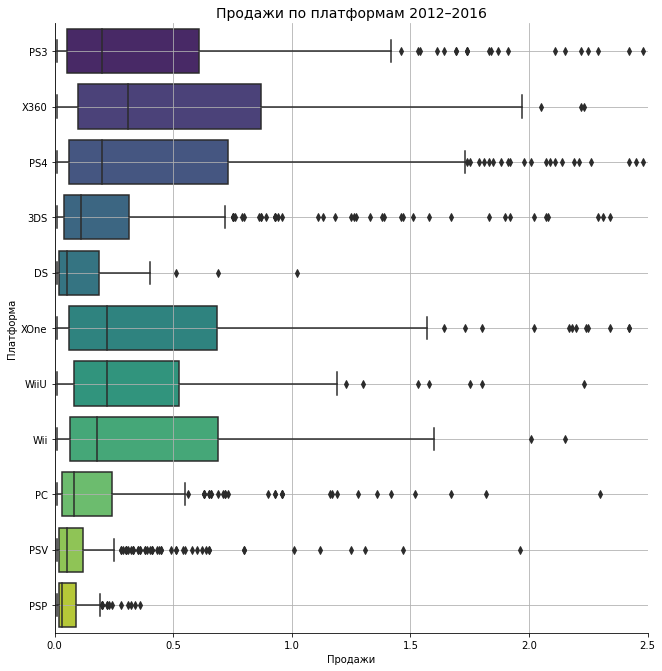

In [37]:
data_prognose_ = data.query('year_of_release >= 2012')
sns.catplot(x='total_sales', y='platform', kind='box', data = data_prognose_.reset_index(), palette='viridis', height=9)
plt.title('Продажи по платформам 2012–2016', fontsize=14)
plt.xlabel('Продажи')
plt.ylabel('Платформа')
plt.xlim(0, 2.5)
plt.grid(True)
plt.show()

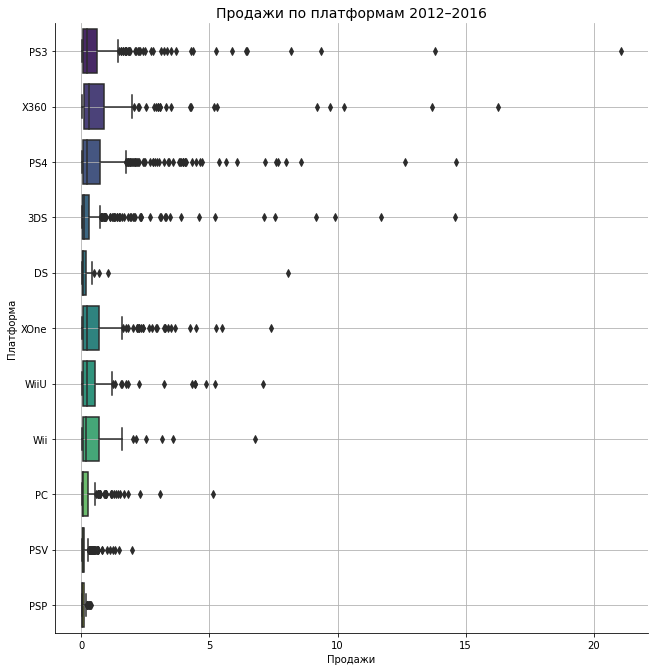

In [38]:
data_prognose_ = data.query('year_of_release >= 2012')
sns.catplot(x='total_sales', y='platform', kind='box', data = data_prognose_.reset_index(), palette='viridis', height=9)
plt.title('Продажи по платформам 2012–2016', fontsize=14)
plt.xlabel('Продажи')
plt.ylabel('Платформа')
plt.grid(True)
plt.show()

Если рассматривать диаграмму со всеми выбросами (без ограничений по ОХ), видно, что значения свыше 5 млн - это единичные выбросы. Я усатновила лимит 2,5 млн, т к это значение больше 75% квартиля, и при таком ограничении график становитс яболее наглядным.

По графику видим, что медианные продажи (по исследуемому периоду 2012-2016) выше всего у платформы Х360 (0.25 млн в год), следующие по медианному объему продаж платформы - PS3, PS4, XOne, WiiU, медианный объем продаж у них примерно одинаковый и примерно равен 0,1-0,15 млн в год.

Максимальный межквартильный рахмах и разброс тоже видим у Х360: квартиль 75% заканчивается значением поримерно 0,8 млн. 
У других лидеров межквартильный размах ниже: примерно 0,7 млн у Wii, XOne, PS4 и примерно 0,6 млн у PS3.
Несмотря на низкое значение среднегодовых продаж платформы 3DS, нужно учитывать динамику продаж, хорошо показанную на предыдущем графике, где видно, что на 2016 год продажи этой платформы в тройке лидеров, просто предыдущие годы средний уровень был ниже из-за отсутствия высокого пика продаж.

Проанализируем влияние на продажи отзывов пользователей и критиков внутри лидирующей в 2016 году платформы PS4.

In [39]:
data_ps4 = data.loc[(data['platform']=='PS4') & (data['user_score']>0) & (data['critic_score']>0)]
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


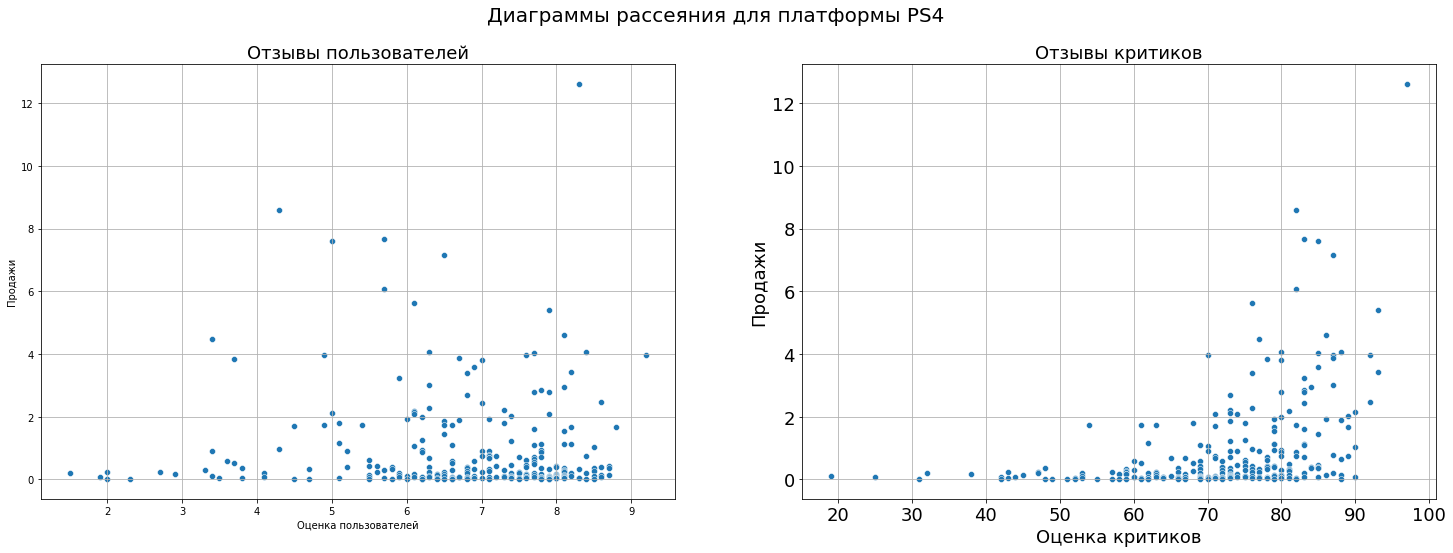

In [40]:
plt.figure(figsize=(25, 8))
plt.suptitle('Диаграммы рассеяния для платформы PS4', fontsize=20)

plt.subplot(1, 2, 1)
plt.title('Отзывы пользователей', fontsize=18)
sns.scatterplot(x='user_score', y='total_sales', data=data_ps4)
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')
plt.rc('font', size= 18)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков', fontsize=18)
sns.scatterplot(x='critic_score', y='total_sales', data=data_ps4)
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
plt.rc('font', size= 18)
plt.grid(True)

In [41]:
corr_user_score = data_ps4['total_sales'].corr(data_ps4['user_score'])
corr_critic_score = data_ps4['total_sales'].corr(data_ps4['critic_score'].astype('float32'))
print(f'\nКоэффицент корреляции между продажами и отзывами пользователей: {corr_user_score:.2f}')
print(f'\nКоэффицент корреляции между продажами и отзывами критиков: {corr_critic_score:.2f}')


Коэффицент корреляции между продажами и отзывами пользователей: -0.03

Коэффицент корреляции между продажами и отзывами критиков: 0.41


Коэффициент корреляции между отзывами пользователей и продажами PS4 почти нулевой. Нельзя сказать, что с ростом оценки объем продаж значимо растет. Корреляция с оценками критиков слабая, но ощутимая - 41%, т е есть небольшой тренд роста продаж при повышении оценок критиков.


Построим диаграммы рассеяния и посчитаем коэффициенты корреляции по другим значимым для анализа платформам.

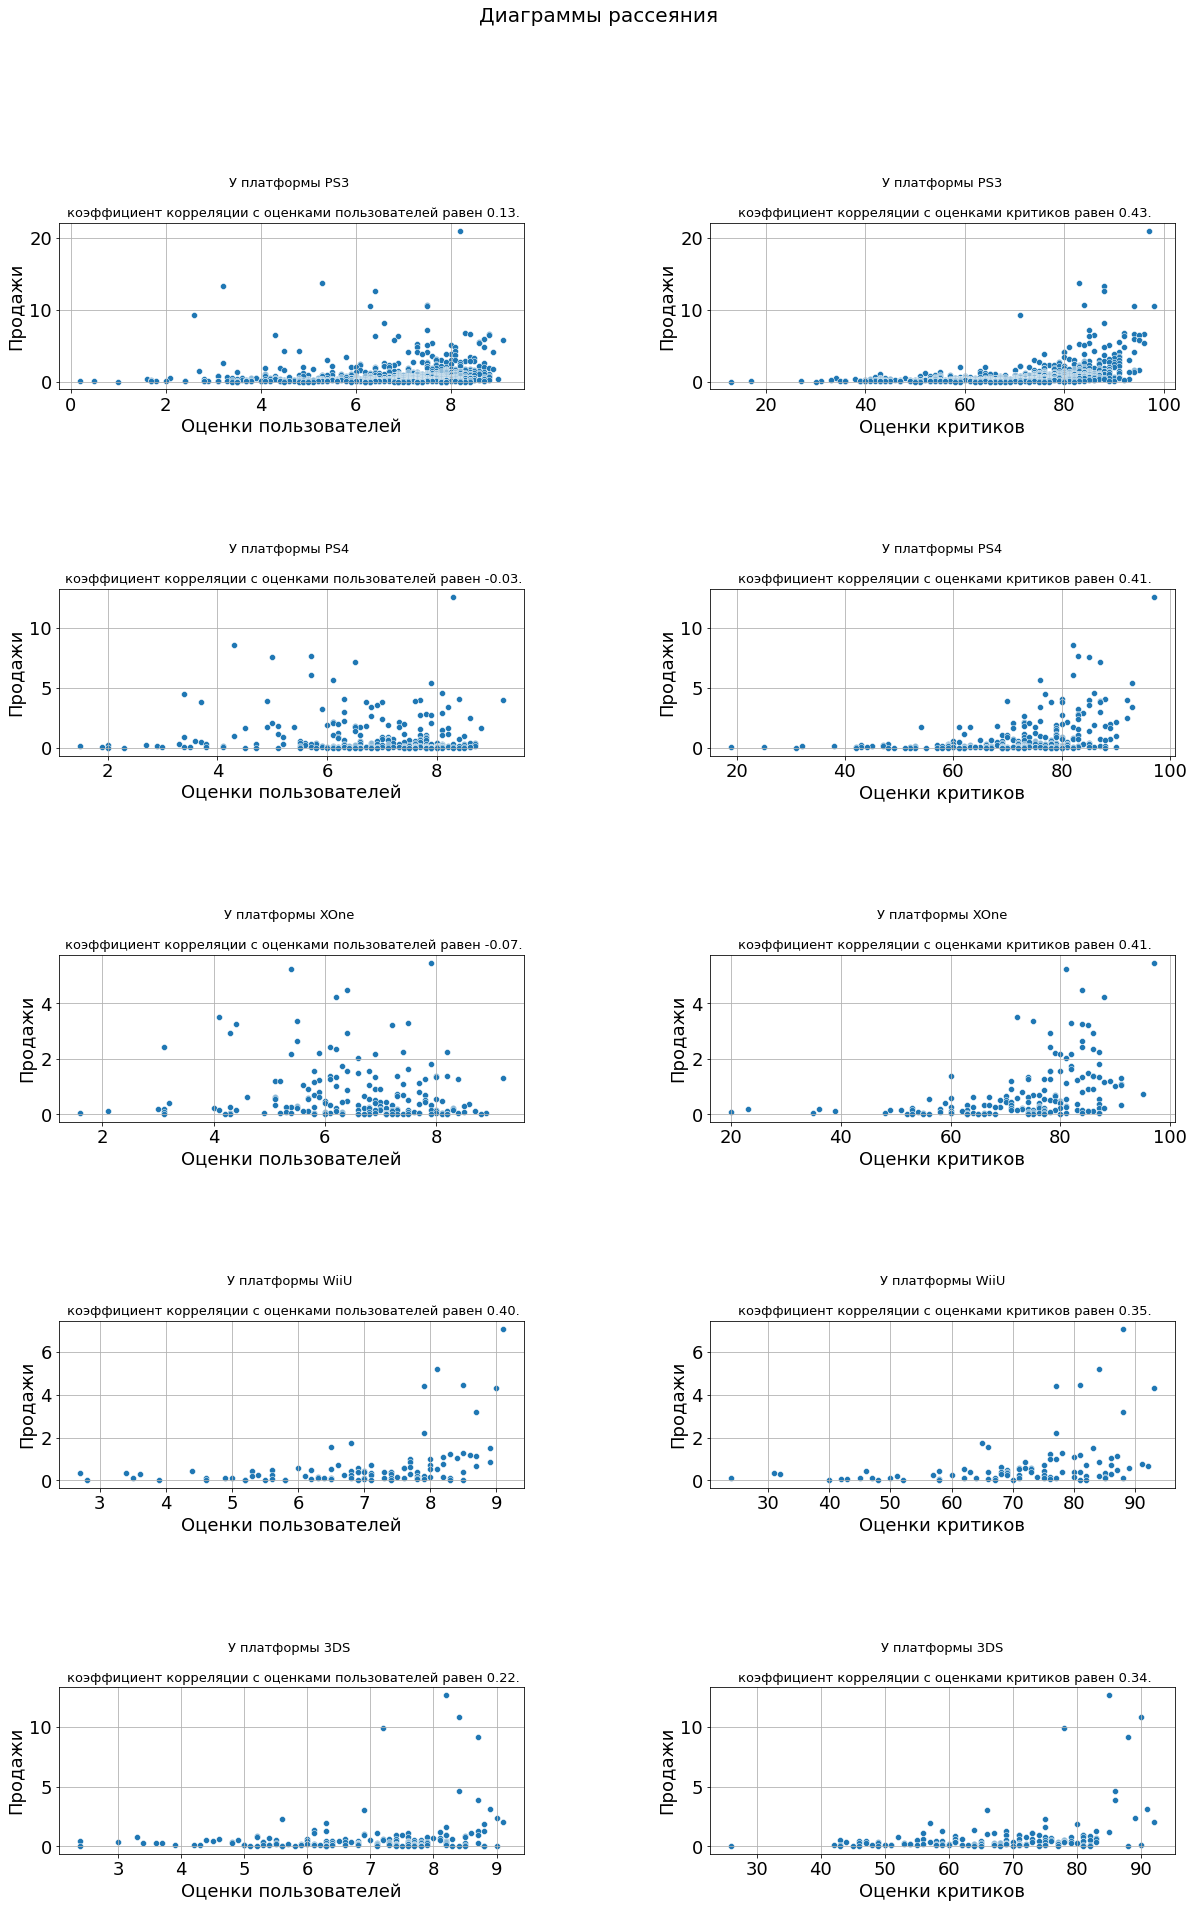

In [42]:
prognose_platforms = ['PS3', 'PS4', 'XOne', 'WiiU', '3DS']
position = 0
plt.figure(figsize=[20,30])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
plt.suptitle('Диаграммы рассеяния', fontsize=20)
for name in prognose_platforms:
    position += 1
    data_name = data[(data['platform'] == name) & (data['user_score'] > 0) & (data['user_score'] >0)]
    
    plt.subplot(5, 2, position)
    corr_user_score = data_name['total_sales'].corr(data_name['user_score'])
    plt.title(f'У платформы {name} \n\n коэффициент корреляции с оценками пользователей равен {corr_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=data_name)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.grid(True)
    
    position += 1
    plt.subplot(5, 2, position)
    corr_critic_score = data_name['total_sales'].corr(data_name['critic_score'].astype('float32'))
    plt.title(f'У платформы {name}\n\n коэффициент корреляции с оценками критиков равен {corr_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=data_name)
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.grid(True)

По всем рассмотренным платформам видим умеренную положительную корреляцию между оценками критиков и продажами: среднее значение коэффициента корреляции равно 35-40%, максимальное значение 43% у платформы PS3.

Корреляция между оценками пользователей и продажами у платформ PS4 и XOne почти отсутствует, коэффициенты отрицательные (-3% и -7%), диаграммы рассеяния очень размытые. Чуть более ощутимая, но все равно слабая корреляция есть между отзывами пользователей и продажами у платформ PS3 (13%) и 3DS (22%), судя по графику в случае с 3DS это обусловлено, скорее, выбросами. 
Умеренная корреляция между отзывами пользователей и продажами 40% у платформы WiiU.

Чтобы определить самый популярные жанры, посчитаем суммарные, медианные продажи по каждому жанру и количество выпусков игр данного жанра.

In [43]:
genre_stat = data_prognose_.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'median', 'count')
).rename(columns={'sum':'Общие продажи, млн.',
                  'median':'Медиана продаж',
                  'count':'Количество релизов'}).\
sort_values(by='Общие продажи, млн.', ascending=False)

total_sales = genre_stat['Общие продажи, млн.'].sum()
genre_stat['% от всех продаж'] = round((genre_stat['Общие продажи, млн.']/total_sales)*100, 1)
display(genre_stat)

,Количество релизов,Медиана продаж,"Общие продажи, млн.",% от всех продаж
genre,,,,
Action,1031,0.120,441.12,30.5
Shooter,235,0.440,304.73,21.1
Role-Playing,370,0.140,192.80,13.4
Sports,266,0.240,178.50,12.4
Misc,192,0.120,85.04,5.9
Platform,85,0.210,61.00,4.2
Racing,115,0.140,53.50,3.7
Fighting,109,0.130,44.49,3.1
Simulation,80,0.120,35.12,2.4


По показателю общих продаж самый популярный и продаваемый жанр - Action (441 млн. или 30% от общего объема продаж) , ощутимо меньше продаж у жанра Shooter (304 млн или 21%), на третьем и четвертом месте жанры Role-Playing (13,3%), Sports (12,5%) и замыкает пятерку лидеров жанр Misc (5,9%). Жанр Action в разы опережает другие жанры по числу выпущенных игр.
Важно отметить, что при заметно меньшем числе релизов и общем объеме продаж средние медианные продажи жанра Shooter ощутимо (в 3,6 раза) выше, чем медианные продажи самого популярного жанра Action. 
Самые непопулярные жанры - Puzzle, Adventure, Strategy.

***Шаг 4.*** 

Составим портрет пользователя каждого региона.
Самые популярные платформы и жанры для каждого региона.

Посчитаем сумму продаж по каждой платформе для Северной Америки и построим круговую диаграмму распределения продаж по платформам.

In [44]:
data_na_platform = data_prognose_.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').\
                   sort_values(by = 'na_sales', ascending = False)
data_na_platform.head(10)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,101.27
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


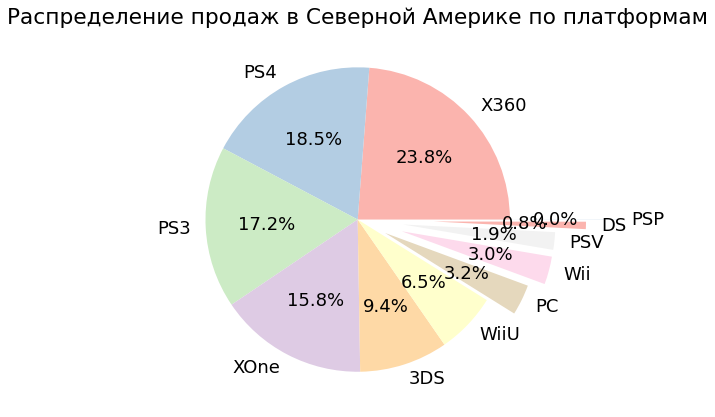

In [45]:
na_colors = sns.color_palette('Pastel1')
data_na_platform.plot(kind='pie', y='na_sales', colors = na_colors, 
    autopct='%.1f%%', figsize=(7, 7), explode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.3, 0.5, 0.7], legend=False)
plt.title('Распределение продаж в Северной Америке по платформам')
plt.ylabel('')
plt.show()

Посчитаем сумму продаж по каждому жанру для Северной Америки и построим круговую диаграмму распределения жанров.

In [46]:
data_na = data_prognose_.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
data_na.head(10)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,79.42
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


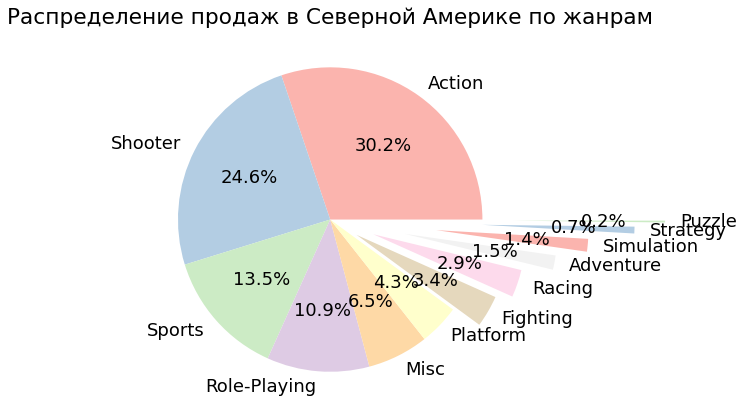

In [47]:
na_colors = sns.color_palette('Pastel1')
data_na.plot(kind='pie', y='na_sales', colors = na_colors, 
    autopct='%.1f%%', figsize=(7, 7), explode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.5, 0.7, 1, 1.2], legend=False)
plt.title('Распределение продаж в Северной Америке по жанрам')
plt.ylabel('')
plt.show()

***В Северной Америке*** самой продаваемой платформой является Х360 (23,7% или 140 млн общим итогом с 2012 года), следующие по популярности - PS4 (18,4%), PS3(17,5%), XOne (15,8%), замыкает пятерку лидеров 3DS (9,4%). 
Самый популярный жанр в этом регионе - Action, почти треть от всех продаж, чуть менее популярным стал жанр Shooter (24,5%), далее c большим отрывом в продажах следуют Sports (13,8%), Role-Playing (10,8%), Misc (6,5%).

Посчитаем сумму продаж по каждой платформе для Евросоюза и построим круговую диаграмму распределения продаж по платформам.

In [48]:
data_eu_platform = data_prognose_.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').\
                   sort_values(by = 'eu_sales', ascending = False)
data_eu_platform.head(10)

,eu_sales
platform,
PS4,141.09
PS3,106.63
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


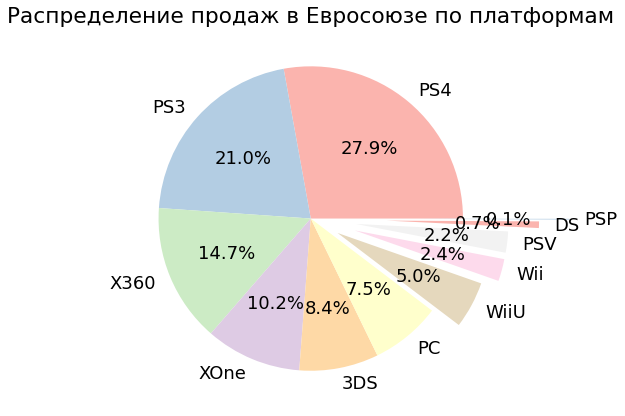

In [49]:
eu_colors = sns.color_palette('Pastel1')
data_eu_platform.plot(kind='pie', y='eu_sales', colors = eu_colors, 
    autopct='%.1f%%', figsize=(7, 7), explode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.3, 0.5, 0.7], legend=False)
plt.title('Распределение продаж в Евросоюзе по платформам')
plt.ylabel('')
plt.show()

Посчитаем сумму продаж по каждому жанру для Евросоюза и построим круговую диаграмму распределения жанров.

In [50]:
data_eu = data_prognose_.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').\
                                    sort_values(by = 'eu_sales', ascending = False)
data_eu.head(10)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,68.86
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


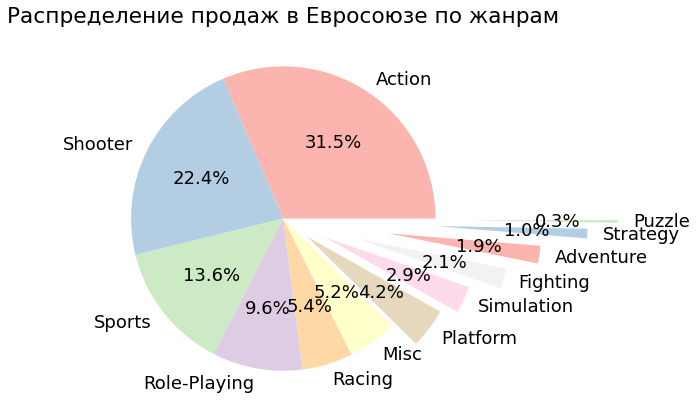

In [51]:
eu_colors = sns.color_palette('Pastel1')
data_eu.plot(kind='pie', y='eu_sales', colors = eu_colors, 
    autopct='%.1f%%', figsize=(7, 7), explode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.5, 0.7, 1, 1.2],legend=False)
plt.title('Распределение продаж в Евросоюзе по жанрам')
plt.ylabel('')
plt.show()

В Евросоюзе самой продаваемой платформой является PS4 (27,8% или 141 млн общим итогом с 2012 года), следующие по популярности - PS3 (21,1%), X360(14,7%), XOne (10,2%), замыкает пятерку лидеров 3DS (8,4%). Самый популярный жанр в этом регионе - Action, 31% от всех продаж (159 млн), чуть менее популярным стал жанр Shooter (22,4%), далее c большим отрывом в продажах следуют Sports (13,6%), Role-Playing (9,6%), Racing (5,4%).

Посчитаем сумму продаж по каждой платформе для Японии и построим круговую диаграмму распределения продаж по платформам.

In [52]:
data_jp_platform = data_prognose_.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').\
                   sort_values(by = 'jp_sales', ascending = False)
data_jp_platform.head(10)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


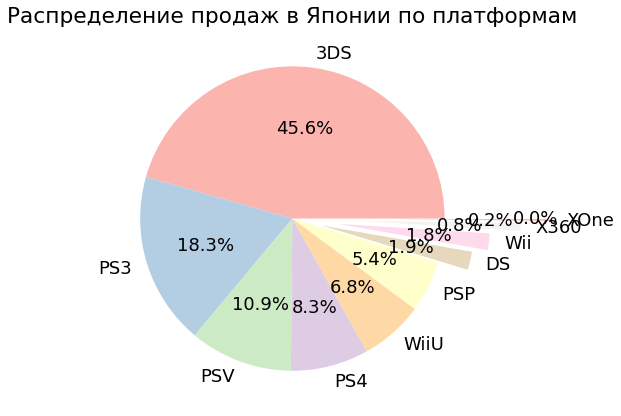

In [53]:
jp_colors = sns.color_palette('Pastel1')
data_jp_platform.plot(kind='pie', y='jp_sales', colors = jp_colors, 
    autopct='%.1f%%', figsize=(7, 7), explode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.5, 0.7, 1], legend=False)
plt.title('Распределение продаж в Японии по платформам')
plt.ylabel('')
plt.show()

Посчитаем сумму продаж по каждому жанру для Японии и построим круговую диаграмму распределения жанров.

In [54]:
data_jp = data_prognose_.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').\
                                    sort_values(by = 'jp_sales', ascending = False)
data_jp.head(10)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


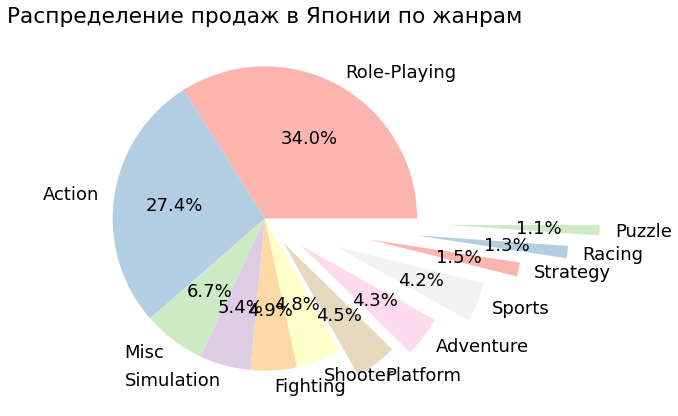

In [55]:
jp_colors = sns.color_palette('Pastel1')
data_jp.plot(kind='pie', y='jp_sales', colors = jp_colors, 
    autopct='%.1f%%', figsize=(7, 7), explode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.5, 0.7, 1, 1.2], legend=False)
plt.title('Распределение продаж в Японии по жанрам')
plt.ylabel('')
plt.show()

Японцы отличаются, как обычно. И в жанровых предпочтениях тоже. Почти половина продаж приходится на платформу 3DS, которая заметно отстает в полпулярности в Америке и Европе. И самым популярным жанром является  Role-Playing (34% или 65,4 млн), в то время как в Америке и Европе этот жанр далеко не самый популярный. 
Следующий по продаваемости у японцев жанр Action (27,4%), и намного меньше продаются остальные жанры: Misc, Simulation, Fighting.

Сделаем для наглядности в одном окне распределение суммарных продаж топ-5 платформ и распределение % продаж топ-5 платформ в разных регионах. % продаж берется от продаж топ-5 платформ.

In [56]:
na_sales = data_prognose_.pivot_table(
    index='platform', values='na_sales', aggfunc='sum'
).nlargest(5, 'na_sales').reset_index()
eu_sales = data_prognose_.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum'
).nlargest(5, 'eu_sales').reset_index()
jp_sales = data_prognose_.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum'
).nlargest(5, 'jp_sales').reset_index()


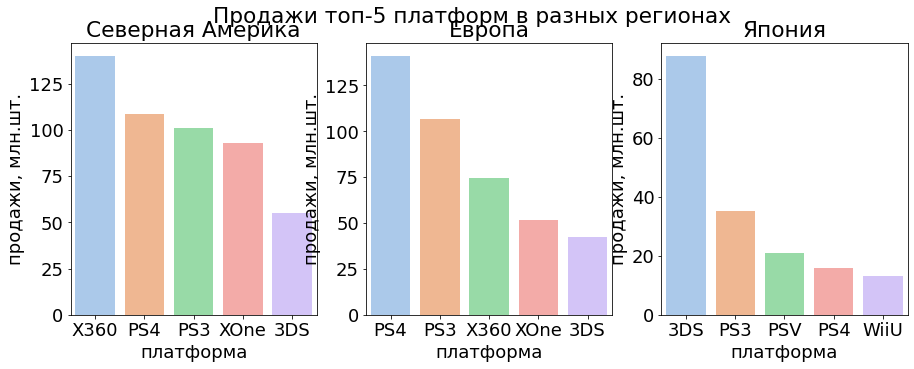

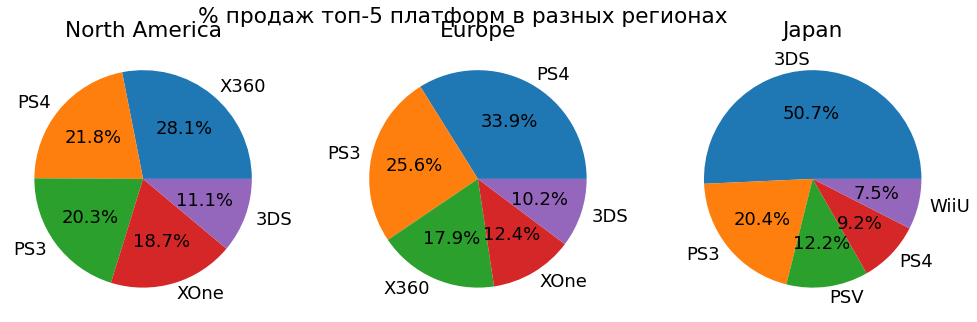

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи топ-5 платформ в разных регионах \n')

sns.barplot(y='na_sales', x='platform', data=na_sales, ax=ax[0], palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.шт.')
ax[0].set_xlabel('платформа')

sns.barplot(y='eu_sales', x='platform', data=eu_sales, ax=ax[1], palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.шт.')
ax[1].set_xlabel('платформа')

sns.barplot(y='jp_sales', x='platform', data=jp_sales, ax=ax[2], palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.шт.')
ax[2].set_xlabel('платформа')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle('% продаж топ-5 платформ в разных регионах')
na_sales.plot(
    kind='pie', y='na_sales',
    autopct='%.1f%%', legend=False, ax=axes[0], labels=na_sales['platform']).set(ylabel='')

eu_sales.plot(
    kind='pie', y='eu_sales', 
    autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_sales['platform']).set(ylabel='')

jp_sales.plot(
    kind='pie', y='jp_sales', 
    autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_sales['platform']).set(ylabel='')

axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show()

Построим столбчатые диаграммы для суммарных продаж  и круговые для % продаж по Топ-5 жанрам 

In [58]:
na_sales_genre = data_prognose_.pivot_table(
    index='genre', values='na_sales', aggfunc='sum'
).nlargest(5, 'na_sales').reset_index()
eu_sales_genre = data_prognose_.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum'
).nlargest(5, 'eu_sales').reset_index()
jp_sales_genre = data_prognose_.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum'
).nlargest(5, 'jp_sales').reset_index()


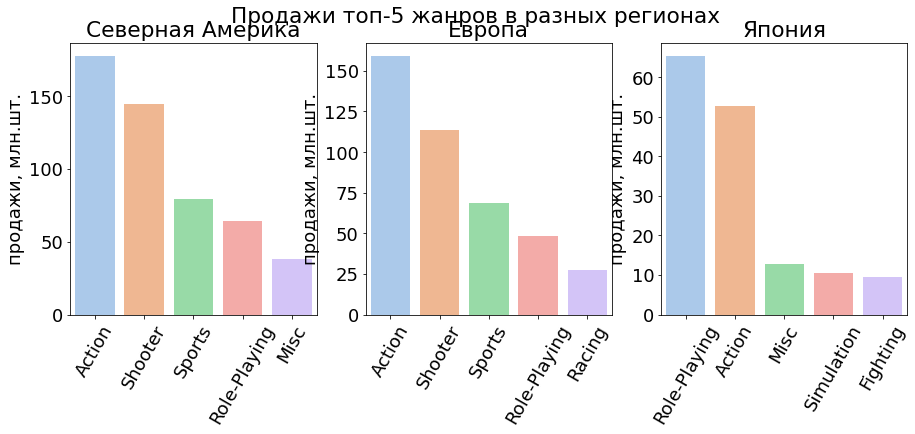

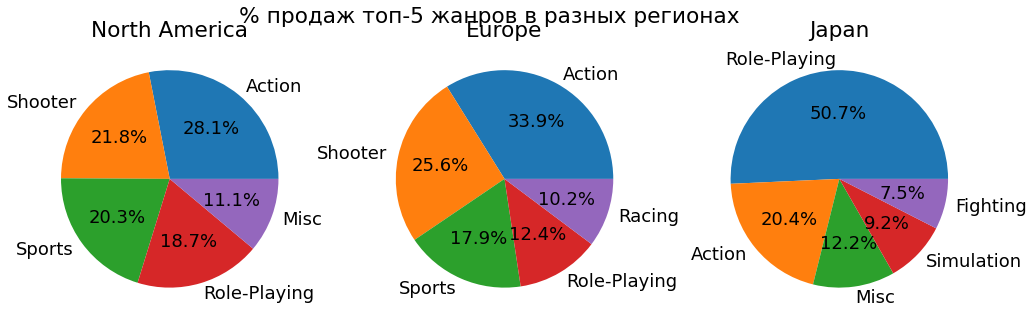

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи топ-5 жанров в разных регионах\n')

sns.barplot(y='na_sales', x='genre', data=na_sales_genre, ax=ax[0], palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.шт.')
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60)


sns.barplot(y='eu_sales', x='genre', data=eu_sales_genre, ax=ax[1], palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.шт.')
ax[1].set_xlabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60)

sns.barplot(y='jp_sales', x='genre', data=jp_sales_genre, ax=ax[2], palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.шт.')
ax[2].set_xlabel('')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=60)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle('% продаж топ-5 жанров в разных регионах\n')
na_sales.plot(
    kind='pie', y='na_sales',
    autopct='%.1f%%', legend=False, ax=axes[0], labels=na_sales_genre['genre']).set(ylabel='')

eu_sales.plot(
    kind='pie', y='eu_sales', 
    autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_sales_genre['genre']).set(ylabel='')

jp_sales.plot(
    kind='pie', y='jp_sales', 
    autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_sales_genre['genre']).set(ylabel='')

axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show()

Ответим на вопрос, влияет ли рейтинг ESRB на продажи в отдельном регионе. Построим диаграммы для каждого региона.

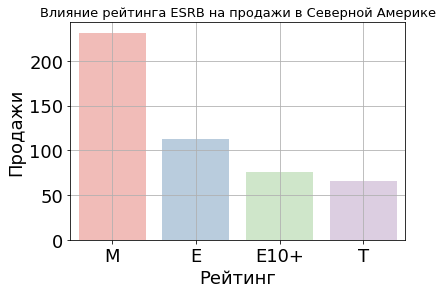

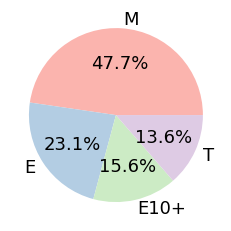

In [61]:
na_rating = data_prognose_.pivot_table(index='rating',
                                          values='na_sales',
                                          aggfunc='sum').reset_index().sort_values(by='na_sales', 
                                                                                   ascending=False).reset_index()
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке', fontsize=13)
sns.barplot(x='rating', y='na_sales', data = na_rating, palette='Pastel1')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.grid(True)

na_rating.plot(kind='pie', y='na_sales', colors = na_colors, 
    autopct='%.1f%%', legend=False, labels=na_rating['rating']).set(ylabel='');

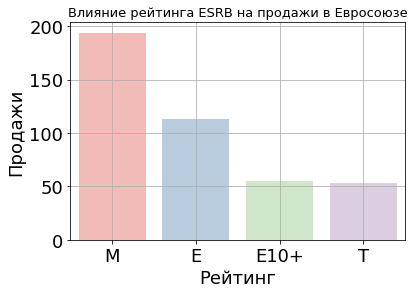

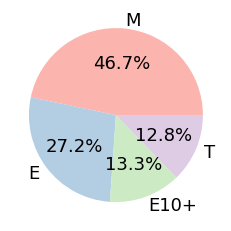

In [62]:
eu_rating = data_prognose_.pivot_table(index='rating',
                                          values='eu_sales',
                                          aggfunc='sum').reset_index().sort_values(by='eu_sales', 
                                                                                   ascending=False).reset_index()
plt.title('Влияние рейтинга ESRB на продажи в Евросоюзе', fontsize=13)
sns.barplot(x='rating', y='eu_sales', data = eu_rating, palette='Pastel1')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.grid(True)

eu_rating.plot(kind='pie', y='eu_sales', colors = eu_colors, 
    autopct='%.1f%%', legend=False, labels=eu_rating['rating']).set(ylabel='');

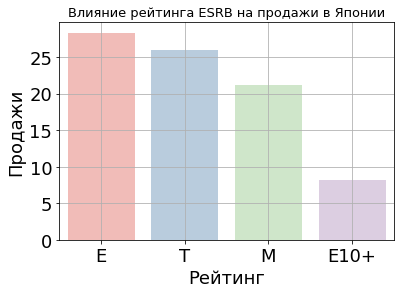

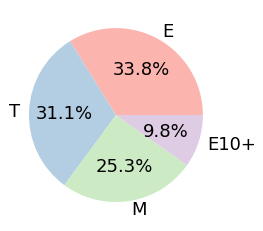

In [63]:
jp_rating = data_prognose_.pivot_table(index='rating',
                                          values='jp_sales',
                                          aggfunc='sum').reset_index().sort_values(by='jp_sales', 
                                                                                   ascending=False).reset_index()
plt.title('Влияние рейтинга ESRB на продажи в Японии', fontsize=13)
sns.barplot(x='rating', y='jp_sales', data = jp_rating, palette='Pastel1')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.grid(True)

jp_rating.plot(kind='pie', y='jp_sales', colors = jp_colors, 
    autopct='%.1f%%', legend=False, labels=jp_rating['rating']).set(ylabel='');

Почти половина продаж в Америке и Европе приходится на игры с рейтингом М (47,5% и 46,7% соответственно), похожим образом распределены продажи игр с рейтингом Е (23% и 27%), Е10+ (15% и 13%) и Т (13% и 12,8%). Японцы тут тоже отличились: треть продаж (34%) приходится на игры с рейтингом Е, вторая треть (31,1%) на игры с рейтингом Т,  игры с рейтингом М продаются ощутимо меньше в процентном соотношении, чем в Европе и Америке (25% в Японии и 46-48% в Европе и Америке).

***Портреты пользователей для каждого региона:***
    
***1)*** В Северной Америке самой продаваемой платформой является Х360 (23,7% или 140 млн общим итогом с 2012 года), следующие по популярности - PS4, PS3, XOne. Самый популярный жанр в Америке - Action, почти треть от всех продаж, чуть менее популярным стал жанр Shooter, далее c большим отрывом в продажах следуют Sports, Role-Playing, Misc.

***2)*** В Евросоюзе самой продаваемой платформой является PS4 (27,8% или 141 млн общим итогом с 2012 года), следующие по популярности - PS3, X360, XOne. Самый популярный жанр в Европе - Action, 31% от всех продаж, менее популярен жанр Shooter, дальше следуют Sports, Role-Playing, Racing.

***3)***  В Японии почти половина продаж приходится на платформу 3DS, которая заметно отстает в полпулярности в Америке и Европе. И самым популярным жанром является Role-Playing (34% или 65,4 млн), в то время как в Америке и Европе этот жанр далеко не самый популярный. Следующий по продаваемости у японцев жанр Action (27,4%), и намного меньше продаются остальные жанры: Misc, Simulation, Fighting.

***4)*** Почти половина продаж в Америке и Европе приходится на игры с рейтингом М, примерно по четверти продаж в этих регионах приходится на игры с рейтингом Е. В Японии игры с рейтингом М сильно уступают в популярности (в два раза по сравнению с Амеркой и Европой): на них приходится только четверть продаж, более трети продаж (34%) приходится на рейтинг Е и еще треть (31,1%) на рейтинг Т.

***Шаг 5. Проверка гипотез.***


***Гипотеза 1:*** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Нулевая гипотеза Н0:*** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Альтернативная гипотеза Н1:*** Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Перед проверкой гипотез нужно понять, отличаются ли дисперсии у пользовательских рейтингов платформ Xbox One и PC. Будем использовать результат сравнения дисперсий для установки параметра equal_var. 

Для проверки равенства дисперсий используем стат тест Левене, который проверяет нулевую гипотезу о том, что входные выборки взяты из совокупностей с равными дисперсиями. Если в результате теста Левене получим низкую p-value, это будет значить, что дисперсии выборок НЕ равны (нулевая гипотеза о равности дисперсий двух выборок отвергается).


In [64]:
data_rating = data_prognose_[data_prognose_['user_score'].notna()]
data_xone = data_rating.loc[data_rating['platform'] == 'XOne']
data_pc =  data_rating.loc[data_rating['platform'] == 'PC']
group_xone = list(data_rating.query('platform == "XOne"')['user_score'])
group_pc = list(data_rating.query('platform == "PC"')['user_score'])


In [65]:
alpha = 0.05
res = stats.levene(group_xone, group_pc, center = 'median')

print('\nЗначение p-value: ', res.pvalue)

if res.pvalue > alpha:
    print('\nДисперсии выборок равны')
else:
    print('\nДисперсии выборок не равны')


Значение p-value:  0.01251484281850554

Дисперсии выборок не равны


По результатам теста Левене установим параметр equal_var = False. Используем двухвыборочный t-test для двух независимых выборок. С помощью двустороннего теста можно ответить на вопрос, равны выборки или нет.

In [66]:
alpha = 0.05
results = st.ttest_ind(group_xone, group_pc, equal_var = False, alternative = 'two-sided')
print('p-value равно ', results.pvalue)
if results.pvalue > alpha:
    print('\nНе получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC равны.')
else:
    print('\nОтвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC не равны')

p-value равно  0.5489537965134912

Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC равны.


По результатам двустороннего t-теста мы пришли к выводу, что получение разных средних значений у двух выборок - это, скорее, случайность, чем закономерность  при условии верности нулевой гипотезы. Мы не можем утверждать, что средние пользовательские рейтинги платформ XOne и PC значимо различаются. Будем считать, что пользовательские рейтинги платформ XOne и PC равны.

***Гипотеза 2*** Нужно проверить предположение о том, что средние пользовательские рейтинги жанров Action и Sports разные.

***Нулевая гипотеза Н0:*** Средние пользовательские рейтинги жанров Action и Sports равны.

***Альтернативная гипотеза Н1:*** Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Перед проверкой гипотез нужно понять, отличаются ли дисперсии у пользовательских рейтингов жанров Action и Sports. Будем использовать результат сравнения дисперсий для установки параметра equal_var.
Оформим выборки с пользовательскими оценками жанров Action и Sports.

In [67]:
data_genre = data_prognose_[data_prognose_['user_score'].notna()]
print(data_genre['user_score'].isna().sum())
data_action = data_genre.loc[data_genre['genre'] == 'Action']
data_sports =  data_genre.loc[data_genre['genre'] == 'Sports']
group_action = list(data_genre.query('genre == "Action"')['user_score'])
group_sports = list(data_genre.query('genre == "Sports"')['user_score'])

0


Используем t-test для проверки равенства дисперсий двух совокупностей: выборки со значениями оценок пользователей жанра Action и выборки со значениями оценок пользователей жанра Sports.

In [68]:
alpha = 0.05
res_ = stats.levene(group_action, group_sports, center = 'median')

print('\nЗначение p-value: ', res_.pvalue)

if res_.pvalue > alpha:
    print('\nДисперсии выборок равны')
else:
    print('\nДисперсии выборок не равны')


Значение p-value:  1.045718795108326e-05

Дисперсии выборок не равны


Низкое значение p-value говорит о том, что дисперсии выборок не равны. Вероятность получить равные значения дисперсий обусловлена случайностью.

Сделаем двусторонний t-тест для проверки равенства средних двух независимых выборок: пользовательских оценок жанра Action и пользовательских оценок жанра Sports. По результатам теста Левене установим значение параметра equal_var = False.

In [69]:
alpha = 0.05
results_ = st.ttest_ind(group_action, group_sports, equal_var = False, alternative = 'two-sided')
print('p-value равно ', results_.pvalue)
if results_.pvalue > alpha:
    print('\nНе получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports равны.')
else:
    print('\nОтвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не равны')

p-value равно  5.989458066467418e-20

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не равны


По итогам двустороннего t-теста мы получили p-value, стремящуюся к нулю. Это значит, что получение разных средних значений у двух выборок - это, скорее, закономерность. Поэтому можно говорить, что средние пользовательские рейтинги жанров Action и Sports отличаются.

Ранее при построении диаграмм жанровых предпочтений пользователей мы увидели, что в Америке и Европе треть продаж приходится на жанр Action, а жанр Sports заметно отстает от него в продажах. Можно проверить еще правостороннюю гипотезу о том, что пользовательские оценки жанра Action выше, чем у жанра Sports.

Используем правосторонний t-test для двух независимых выборок. Мы предполагаем, что оценки жанра Action выше, поэтому при написании кода первой укажем выбороку оценок жанра Action и укажем параметр alternative = 'greater'.

***Нулевая гипотеза Н0:*** Средние пользовательские рейтинги жанров Action и Sports равны.

***Альтернативная гипотеза Н1:*** Средний пользовательский рейтинг жанра Action выше, чем средний пользовательский рейтинг жанра  Sports.

In [70]:
alpha = 0.05
results_right = st.ttest_ind(group_action, group_sports, equal_var = False, alternative = 'greater')
print('p-value равно ', results_right.pvalue)
if results_right.pvalue > alpha:
    print('\nНе получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports равны.')
else:
    print('\nОтвергаем нулевую гипотезу.  Средний пользовательский рейтинг жанра Action выше, чем средний пользовательский рейтинг жанра Sports.')

p-value равно  2.994729033233709e-20

Отвергаем нулевую гипотезу.  Средний пользовательский рейтинг жанра Action выше, чем средний пользовательский рейтинг жанра Sports.


Как и предполагалось, по результатам теста у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports равны. Отклоняем нулевую гипотезу в пользу того, что средний пользовательский рейтинг жанра Action выше. 

Не просто так почти треть всех продаж в Америке и Европе приходится на этот жанр.

***Общий вывод:***

***1)*** Число выпускаемых игр до 1990 года было низким в сравнении с остальными периодами, в 1990-1995 наметился устойчивый рост, к 2000 году число выпускаемых в год игр вырсоло в 2 раза (с 200 до 400 в год). С 2000 по 2009 наблюдался стремительный рост (в 3,5 раза), число выпускаемых игр достигло максимума в 2009 г (более 1440 игр в год), затем наблюдалось стремительное падение к 2012 году. После 2012 года резких скачков в количестве выпускаемых игр не было.

***2)***  По итогам подсчета суммарных продаж можно выделить 6 платформ-лидеров: PS2, X360, PS3, Wii, DS, PS. Несмотря на явное лидерство платформы PS2 ее продажи падают экспоненциально с 2004 года. Похожие экспоненциальные тенденции падения продаж с 2009 года наблюдаются у платформы Wii и примерно с 2008 года у DS. 
Важно отметить, что все платформы находятся на стадии спада продаж, но относительно высокие продажи в 2016 году отмечаются у платформ ***PS4*** (70 млн в год), ***XOne*** (30 млн), ***3DS*** (20 млн). Именно эти платформы следует рассматривать как потенциально прибыльные. Остальные анализируемые платформы судя по графикам близки к завершени жизненного цикла.
Характерный срок, за который исчезают старые и появляются новые платформы - примерно 8 лет.

***3)*** Мы установили актуальный период планирования 4 года, т к новые платформы, появившиеся в 2011-2013 годах, уже достигли пиков продаж и пошли на спад. Ранее вышедшие платформы имели в среднем более долгий срок жизни, более длительные периоды роста, существенно более высокие пики продаж и долгие периоды спада.

***4)*** По всем платформам видна умеренная положительная корреляция между оценками критиков и продажами: среднее значение коэффициента корреляции равно 35-40%, максимальное значение 43% у платформы PS3.

Корреляция между оценками пользователей и продажами у платформ PS4 и XOne почти отсутствует, слабая корреляция, обусловленная, скорее, выбросами, чем тенденцией, есть между отзывами пользователей и продажами у платформ PS3 (13%) и 3DS (22%). Умеренная корреляция между отзывами пользователей и продажами 40% у платформы WiiU.

Значит, при планировании рекламной кампании следует ориентироваться на оценки критиков.

***5)*** По показателю общих продаж самый популярный и продаваемый жанр - Action (441 млн. или 30% от общего объема продаж) , ощутимо меньше продаж у жанра Shooter (304 млн или 21%), на третьем и четвертом месте жанры Role-Playing (13,3%), Sports (12,5%) и замыкает пятерку лидеров жанр Misc (5,9%). Жанр Action в разы опережает другие жанры по числу выпущенных игр. Важно отметить, что при заметно меньшем числе релизов и общем объеме продаж средние медианные продажи жанра Shooter ощутимо (в 3,6 раза) выше, чем медианные продажи самого популярного жанра Action.

***6)*** Портреты пользователей для трех регионов:
- ***В Северной Америке*** самой продаваемой платформой является Х360 (23,7% продаж), следующие по популярности - PS4 (18,4%), PS3(17,5%), XOne (15,8%), замыкает пятерку лидеров 3DS (9,4%). Самый популярный жанр в этом регионе - Action, на него приходится почти треть всех продаж, чуть менее популярным стал жанр Shooter (24,5%), далее c большим отрывом в продажах следуют Sports (13,8%), Role-Playing (10,8%), Misc (6,5%).
- ***В Европе*** самой популярной платформой является PS4 (27,8%), следующие по популярности - PS3 (21,1%), X360(14,7%), XOne (10,2%), замыкает пятерку лидеров 3DS (8,4%). Самый популярный жанр в этом регионе - Action, 31% от всех продаж (159 млн), следующий  по популярности - Shooter (22,4%), средние по продажам - Sports (13,6%), Role-Playing (9,6%), Racing (5,4%).
- ***В Японии*** почти половина продаж приходится на платформу 3DS, которая заметно отстает по продажам в Америке и Европе. И самым популярным жанром является Role-Playing (34% или 65,4 млн), в то время как в Америке и Европе этот жанр далеко не самый популярный. Следующий по продаваемости у японцев жанр Action (27,4%), и намного меньше продаются остальные жанры: Misc, Simulation, Fighting.

***7)*** Почти половина продаж в Америке и Европе приходится на игры с рейтингом М, примерно по четверти продаж в этих регионах приходится на игры с рейтингом Е. В Японии игры с рейтингом М сильно уступают в популярности (в два раза по сравнению с Амеркой и Европой): на них приходится только четверть продаж, более трети продаж (34%) приходится на рейтинг Е и еще треть (31,1%) на рейтинг Т.

Самые продаваемые игры имеют рейтинги ***М*** и ***Е***.

***8)*** Проверка гипотез.
 - ***Гипотеза 1:*** По итогам t-теста мы не смогли опровергнуть гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC равны.
 - ***Гипотеза 2:*** По итогам t-теста мы отвергли гипотезу о том, что рейтинги жанров Action и Sports равны. С помощью правостороннего теста мы склонились к предположению, что средний пользовательский рейтинг жанра Action выше. Графики распределения продаж по жанрам  также говорят о самой высокой популярности этого жанра в Европе и Северной Америке.
